

---



(140, 2)
(60, 2)
(140,)
(60,)


<ipython-input-16-7fa8bb68e92f>:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], color='blue', edgecolor='k', label='Class 0 (test)', marker='x')
<ipython-input-16-7fa8bb68e92f>:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], color='red', edgecolor='k', label='Class 1 (test)', marker='x')


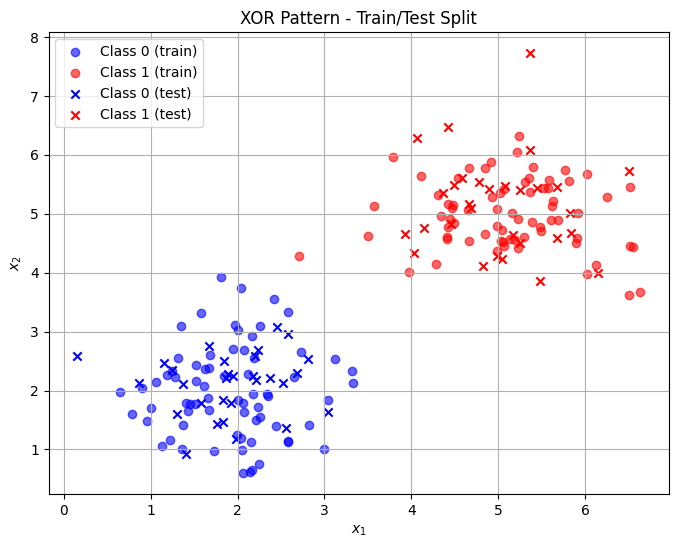

Epoch [10/100], Accuracy: 100.00%
Epoch [20/100], Accuracy: 100.00%
Epoch [30/100], Accuracy: 100.00%
Epoch [40/100], Accuracy: 100.00%
Epoch [50/100], Accuracy: 100.00%
Epoch [60/100], Accuracy: 100.00%
Epoch [70/100], Accuracy: 100.00%
Epoch [80/100], Accuracy: 100.00%
Epoch [90/100], Accuracy: 100.00%
Epoch [100/100], Accuracy: 100.00%
Train Accuracy: 100.00%
Test Accuracy: 100.00%


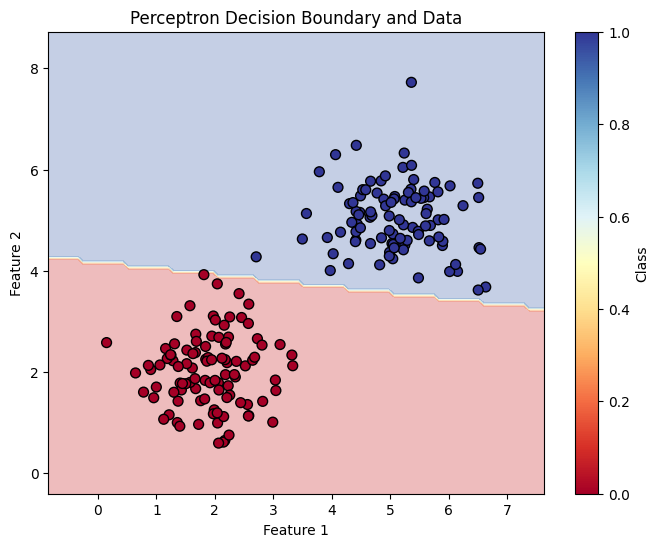

tensor([ 0.1571, -0.0437])


<ipython-input-16-7fa8bb68e92f>:159: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], color='blue', edgecolor='k', label='Class 0 (test)', marker='x')
<ipython-input-16-7fa8bb68e92f>:160: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], color='red', edgecolor='k', label='Class 1 (test)', marker='x')


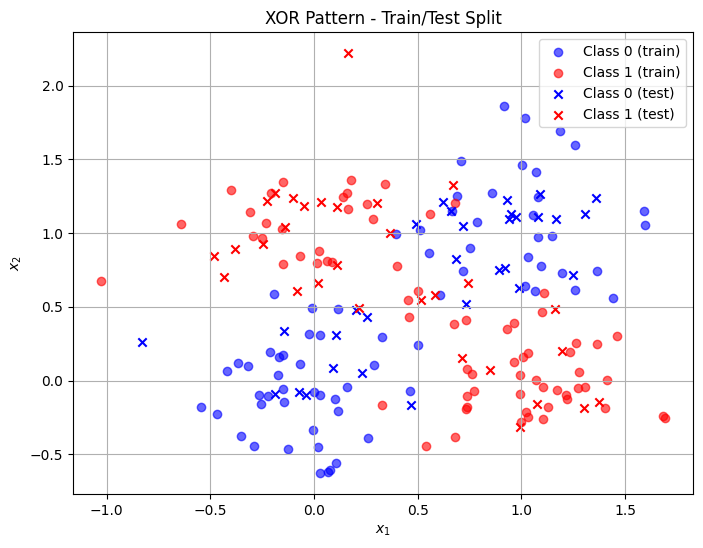

Epoch [10/100], Accuracy: 50.00%
Epoch [20/100], Accuracy: 50.00%
Epoch [30/100], Accuracy: 50.00%
Epoch [40/100], Accuracy: 50.00%
Epoch [50/100], Accuracy: 65.00%
Epoch [60/100], Accuracy: 51.43%
Epoch [70/100], Accuracy: 50.00%
Epoch [80/100], Accuracy: 50.00%
Epoch [90/100], Accuracy: 55.71%
Epoch [100/100], Accuracy: 50.00%
[Perceptron]Train Accuracy: 50.00%
[Perceptron]Test Accuracy: 50.00%
[LogReg] Epoch 200, Loss: 0.7109, Train Acc: 38.57%
[LogReg] Epoch 400, Loss: 0.7013, Train Acc: 33.57%
[LogReg] Epoch 600, Loss: 0.6946, Train Acc: 50.71%
[LogReg] Epoch 800, Loss: 0.6898, Train Acc: 69.29%
[LogReg] Epoch 1000, Loss: 0.6862, Train Acc: 64.29%
[LogReg] Epoch 1200, Loss: 0.6836, Train Acc: 60.71%
[LogReg] Epoch 1400, Loss: 0.6817, Train Acc: 59.29%
[LogReg] Epoch 1600, Loss: 0.6803, Train Acc: 59.29%
[LogReg] Epoch 1800, Loss: 0.6792, Train Acc: 59.29%
[LogReg] Epoch 2000, Loss: 0.6784, Train Acc: 59.29%
[LogReg] Final Train Accuracy: 59.29%
[LogReg] Final Test Accuracy: 38.33%

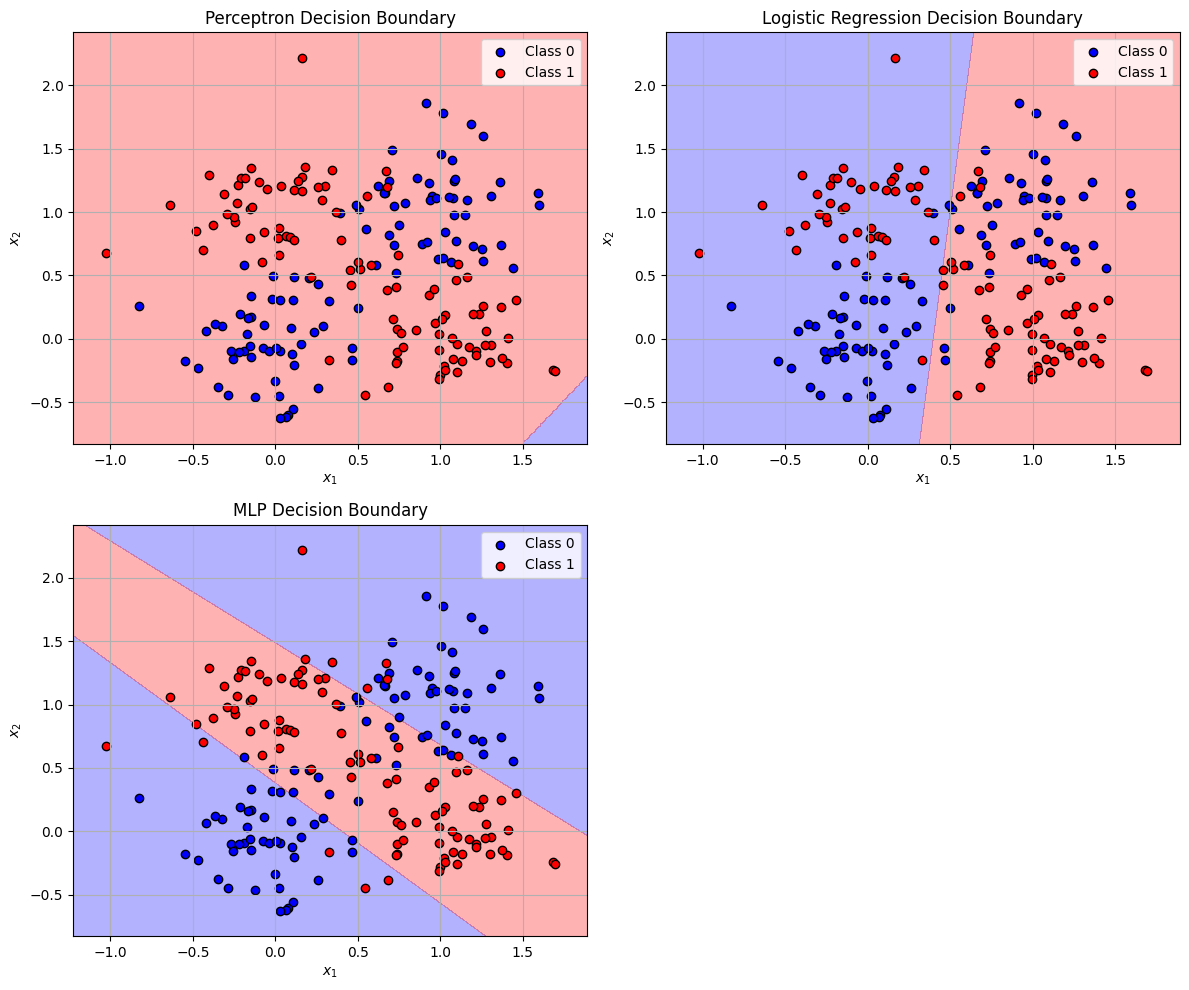

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#_____________________________________________________________________________________________________________________________________
# 랜덤 시드 고정 (재현 가능하도록)
np.random.seed(42)

# 클래스 0: (x1, x2) around (2, 2)
class_0 = np.random.multivariate_normal(mean=[2, 2], cov=[[0.5, 0], [0, 0.5]], size=100)
labels_0 = np.zeros(100)

# 클래스 1: (x1, x2) around (5, 5)
class_1 = np.random.multivariate_normal(mean=[5, 5], cov=[[0.5, 0], [0, 0.5]], size=100)
labels_1 = np.ones(100)

# 데이터와 라벨 합치기
X = np.vstack((class_0, class_1))
y = np.hstack((labels_0, labels_1))

# train/test 셋 나누기 (stratify=y는 클래스 비율 유지 위해)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='blue', label='Class 0 (train)', alpha=0.6)
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='red', label='Class 1 (train)', alpha=0.6)
plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], color='blue', edgecolor='k', label='Class 0 (test)', marker='x')
plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], color='red', edgecolor='k', label='Class 1 (test)', marker='x')
plt.legend()
plt.title("XOR Pattern - Train/Test Split")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.show()

#_____________________________________________________________________________________________________________________________________
# Perceptron 모델 구현
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.zeros(input_size)  # 초기 가중치
        self.bias = 0  # 초기 바이어스

    def activation(self, x):
        return 1 if x >= 0 else 0

    def forward(self, x):
        return self.activation(np.dot(x, self.weights) + self.bias)

    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(X)):
                output = self.forward(X[i])
                error = y[i] - output  # 오차 계산

                # 가중치와 바이어스 업데이트
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

            # Accuracy 출력
            if (epoch + 1) % 10 == 0:
                predictions = self.predict(X)
                accuracy = np.mean(predictions == y) * 100
                print(f'Epoch [{epoch + 1}/{self.epochs}], Accuracy: {accuracy:.2f}%')

    def predict(self, X):
        return np.array([self.forward(x) for x in X])

#_____________________________________________________________________________________________________________________________________
# Perceptron 학습
perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=100)
perceptron.train(X_train, y_train)

# Accuracy 평가
train_predictions = perceptron.predict(X_train)
train_accuracy = np.mean(train_predictions == y_train) * 100

test_predictions = perceptron.predict(X_test)
test_accuracy = np.mean(test_predictions == y_test) * 100

print(f'Train Accuracy: {train_accuracy:.2f}%')
print(f'Test Accuracy: {test_accuracy:.2f}%')

#_____________________________________________________________________________________________________________________________________
# Decision boundary 시각화
# Meshgrid 생성하여 boundary 계산

#_____________________________________________________________________________________________________________________________________
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))

# 입력 데이터로 변환
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Perceptron을 사용하여 예측값 계산
Z = perceptron.predict(grid_points)

# Contour plot으로 decision boundary 그리기
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

# Decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

# 학습 데이터 포인트
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', s=50)
plt.title("Perceptron Decision Boundary and Data")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()



#_____________________________________________________________________________________________________________________________________
# XOR 데이터 생성

#_____________________________________________________________________________________________________________________________________
np.random.seed(42)
class_0 = np.vstack((
    np.random.multivariate_normal([0, 0], [[0.1, 0], [0, 0.1]], 50),
    np.random.multivariate_normal([1, 1], [[0.1, 0], [0, 0.1]], 50)
))
class_1 = np.vstack((
    np.random.multivariate_normal([0, 1], [[0.1, 0], [0, 0.1]], 50),
    np.random.multivariate_normal([1, 0], [[0.1, 0], [0, 0.1]], 50)
))
X = np.vstack((class_0, class_1))
y = np.hstack((np.zeros(100), np.ones(100)))

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Tensor로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
print(X_train_tensor[0])

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train==0][:, 0], X_train[y_train==0][:, 1], color='blue', label='Class 0 (train)', alpha=0.6)
plt.scatter(X_train[y_train==1][:, 0], X_train[y_train==1][:, 1], color='red', label='Class 1 (train)', alpha=0.6)
plt.scatter(X_test[y_test==0][:, 0], X_test[y_test==0][:, 1], color='blue', edgecolor='k', label='Class 0 (test)', marker='x')
plt.scatter(X_test[y_test==1][:, 0], X_test[y_test==1][:, 1], color='red', edgecolor='k', label='Class 1 (test)', marker='x')
plt.legend()
plt.title("XOR Pattern - Train/Test Split")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.show()

#_____________________________________________________________________________________________________________________________________
# Perceptron 학습

#_____________________________________________________________________________________________________________________________________
perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=100)
perceptron.train(X_train, y_train)

# Accuracy 평가
train_predictions = perceptron.predict(X_train)
train_accuracy = np.mean(train_predictions == y_train) * 100

test_predictions = perceptron.predict(X_test)
test_accuracy = np.mean(test_predictions == y_test) * 100

print(f'[Perceptron]Train Accuracy: {train_accuracy:.2f}%')
print(f'[Perceptron]Test Accuracy: {test_accuracy:.2f}%')

# -----------------------------------
# Logistic Regression
# -----------------------------------
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)  # BCEWithLogitsLoss를 쓸 것이므로 sigmoid 없음

lr_model = LogisticRegression()
criterion = nn.BCEWithLogitsLoss()
lr_optimizer = optim.SGD(lr_model.parameters(), lr=0.01)

epochs = 2000
for epoch in range(epochs):
    outputs = lr_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    lr_optimizer.zero_grad()
    loss.backward()
    lr_optimizer.step()

    if (epoch + 1) % 200 == 0:
        with torch.no_grad():
            preds = (torch.sigmoid(outputs) >= 0.5).float()
            acc = (preds == y_train_tensor).float().mean() * 100
            print(f"[LogReg] Epoch {epoch+1}, Loss: {loss.item():.4f}, Train Acc: {acc:.2f}%")

# 최종 Accuracy
with torch.no_grad():
    train_pred = (torch.sigmoid(lr_model(X_train_tensor)) >= 0.5).float()
    test_pred = (torch.sigmoid(lr_model(X_test_tensor)) >= 0.5).float()
    train_acc = (train_pred == y_train_tensor).float().mean() * 100
    test_acc = (test_pred == y_test_tensor).float().mean() * 100
    print(f"[LogReg] Final Train Accuracy: {train_acc:.2f}%")
    print(f"[LogReg] Final Test Accuracy: {test_acc:.2f}%")

# -----------------------------------
# MLP
# -----------------------------------

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(2, 2)
        self.activation = nn.ReLU()  # 또는 nn.ReLU()
        self.output = nn.Linear(2, 1)

    def forward(self, x):
        x = self.activation(self.hidden(x))  # 은닉층에 비선형성 적용
        x = self.output(x)  # 그대로 출력
        return x  # BCEWithLogitsLoss와 함께 사용하므로 sigmoid 안 씀

mlp_model = MLP()
mlp_optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)
mlp_criterion = nn.BCEWithLogitsLoss()


for epoch in range(epochs):
    outputs = mlp_model(X_train_tensor)
    loss = mlp_criterion(outputs, y_train_tensor)

    mlp_optimizer.zero_grad()
    loss.backward()
    mlp_optimizer.step()

    if (epoch + 1) % 200 == 0:
        with torch.no_grad():
            preds = (torch.sigmoid(outputs) >= 0.5).float()
            acc = (preds == y_train_tensor).float().mean() * 100
            print(f"[MLP] Epoch {epoch+1}, Loss: {loss.item():.4f}, Train Acc: {acc:.2f}%")

# 최종 Accuracy
with torch.no_grad():
    train_pred = (torch.sigmoid(mlp_model(X_train_tensor)) >= 0.5).float()
    test_pred = (torch.sigmoid(mlp_model(X_test_tensor)) >= 0.5).float()
    train_acc = (train_pred == y_train_tensor).float().mean() * 100
    test_acc = (test_pred == y_test_tensor).float().mean() * 100
    print(f"[MLP] Final Train Accuracy: {train_acc:.2f}%")
    print(f"[MLP] Final Test Accuracy: {test_acc:.2f}%")

import matplotlib.pyplot as plt


#_____________________________________________________________________________________________________________________________________

# --- 유틸 함수 ---

#_____________________________________________________________________________________________________________________________________
def plot_decision_boundary(model, X, y, title, is_torch_model=False, ax=None):
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    if is_torch_model:
        with torch.no_grad():
            inputs = torch.tensor(grid, dtype=torch.float32)
            outputs = model(inputs)
            probs = torch.sigmoid(outputs).numpy().reshape(xx.shape)
    else:
        probs = model.predict(grid).reshape(xx.shape)

    ax.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'red'])
    ax.scatter(X[y==0][:, 0], X[y==0][:, 1], c='blue', label='Class 0', edgecolor='k')
    ax.scatter(X[y==1][:, 0], X[y==1][:, 1], c='red', label='Class 1', edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.legend()
    ax.grid(True)

# --- 시각화 호출 (2x2 grid) ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Perceptron
plot_decision_boundary(perceptron, X, y, "Perceptron Decision Boundary", ax=axes[0, 0])

# Logistic Regression
plot_decision_boundary(lr_model, X, y, "Logistic Regression Decision Boundary", is_torch_model=True, ax=axes[0, 1])

# MLP
plot_decision_boundary(mlp_model, X, y, "MLP Decision Boundary", is_torch_model=True, ax=axes[1, 0])

# (Optional) 빈 자리에 다른 플롯을 넣거나 제거할 수 있음
axes[1, 1].axis('off')  # 4번째 플롯은 비워두기

plt.tight_layout()
plt.show()




